## 데이터셋 설명
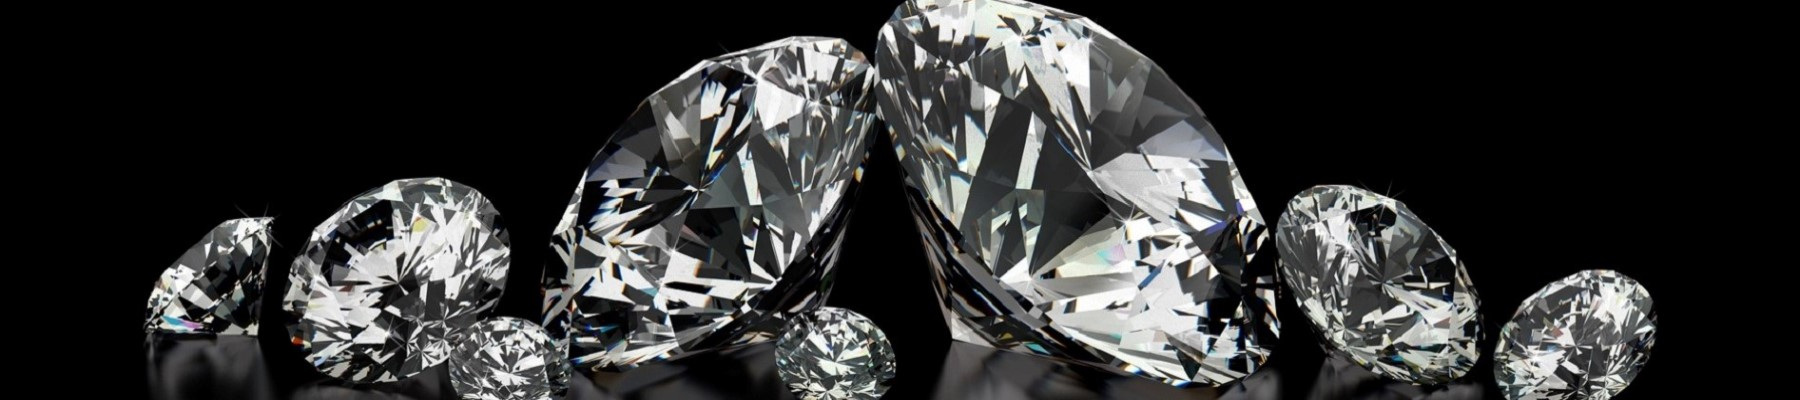

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [2]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [12]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: price - carat
* 범주형 - 수치형: cut - carat
* 범주형 - 범주형: color - clarity

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형
* 귀무가설: 가격과 캐럿은 선형 상관관계가 없다.
* 대립가설: 가족 수와 운임은 선형 상관관계가 있다. 

#### 시각화

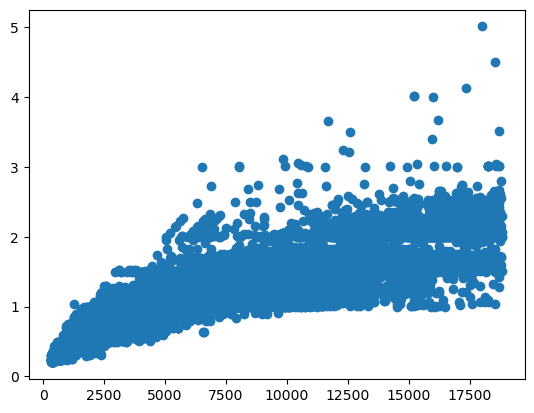

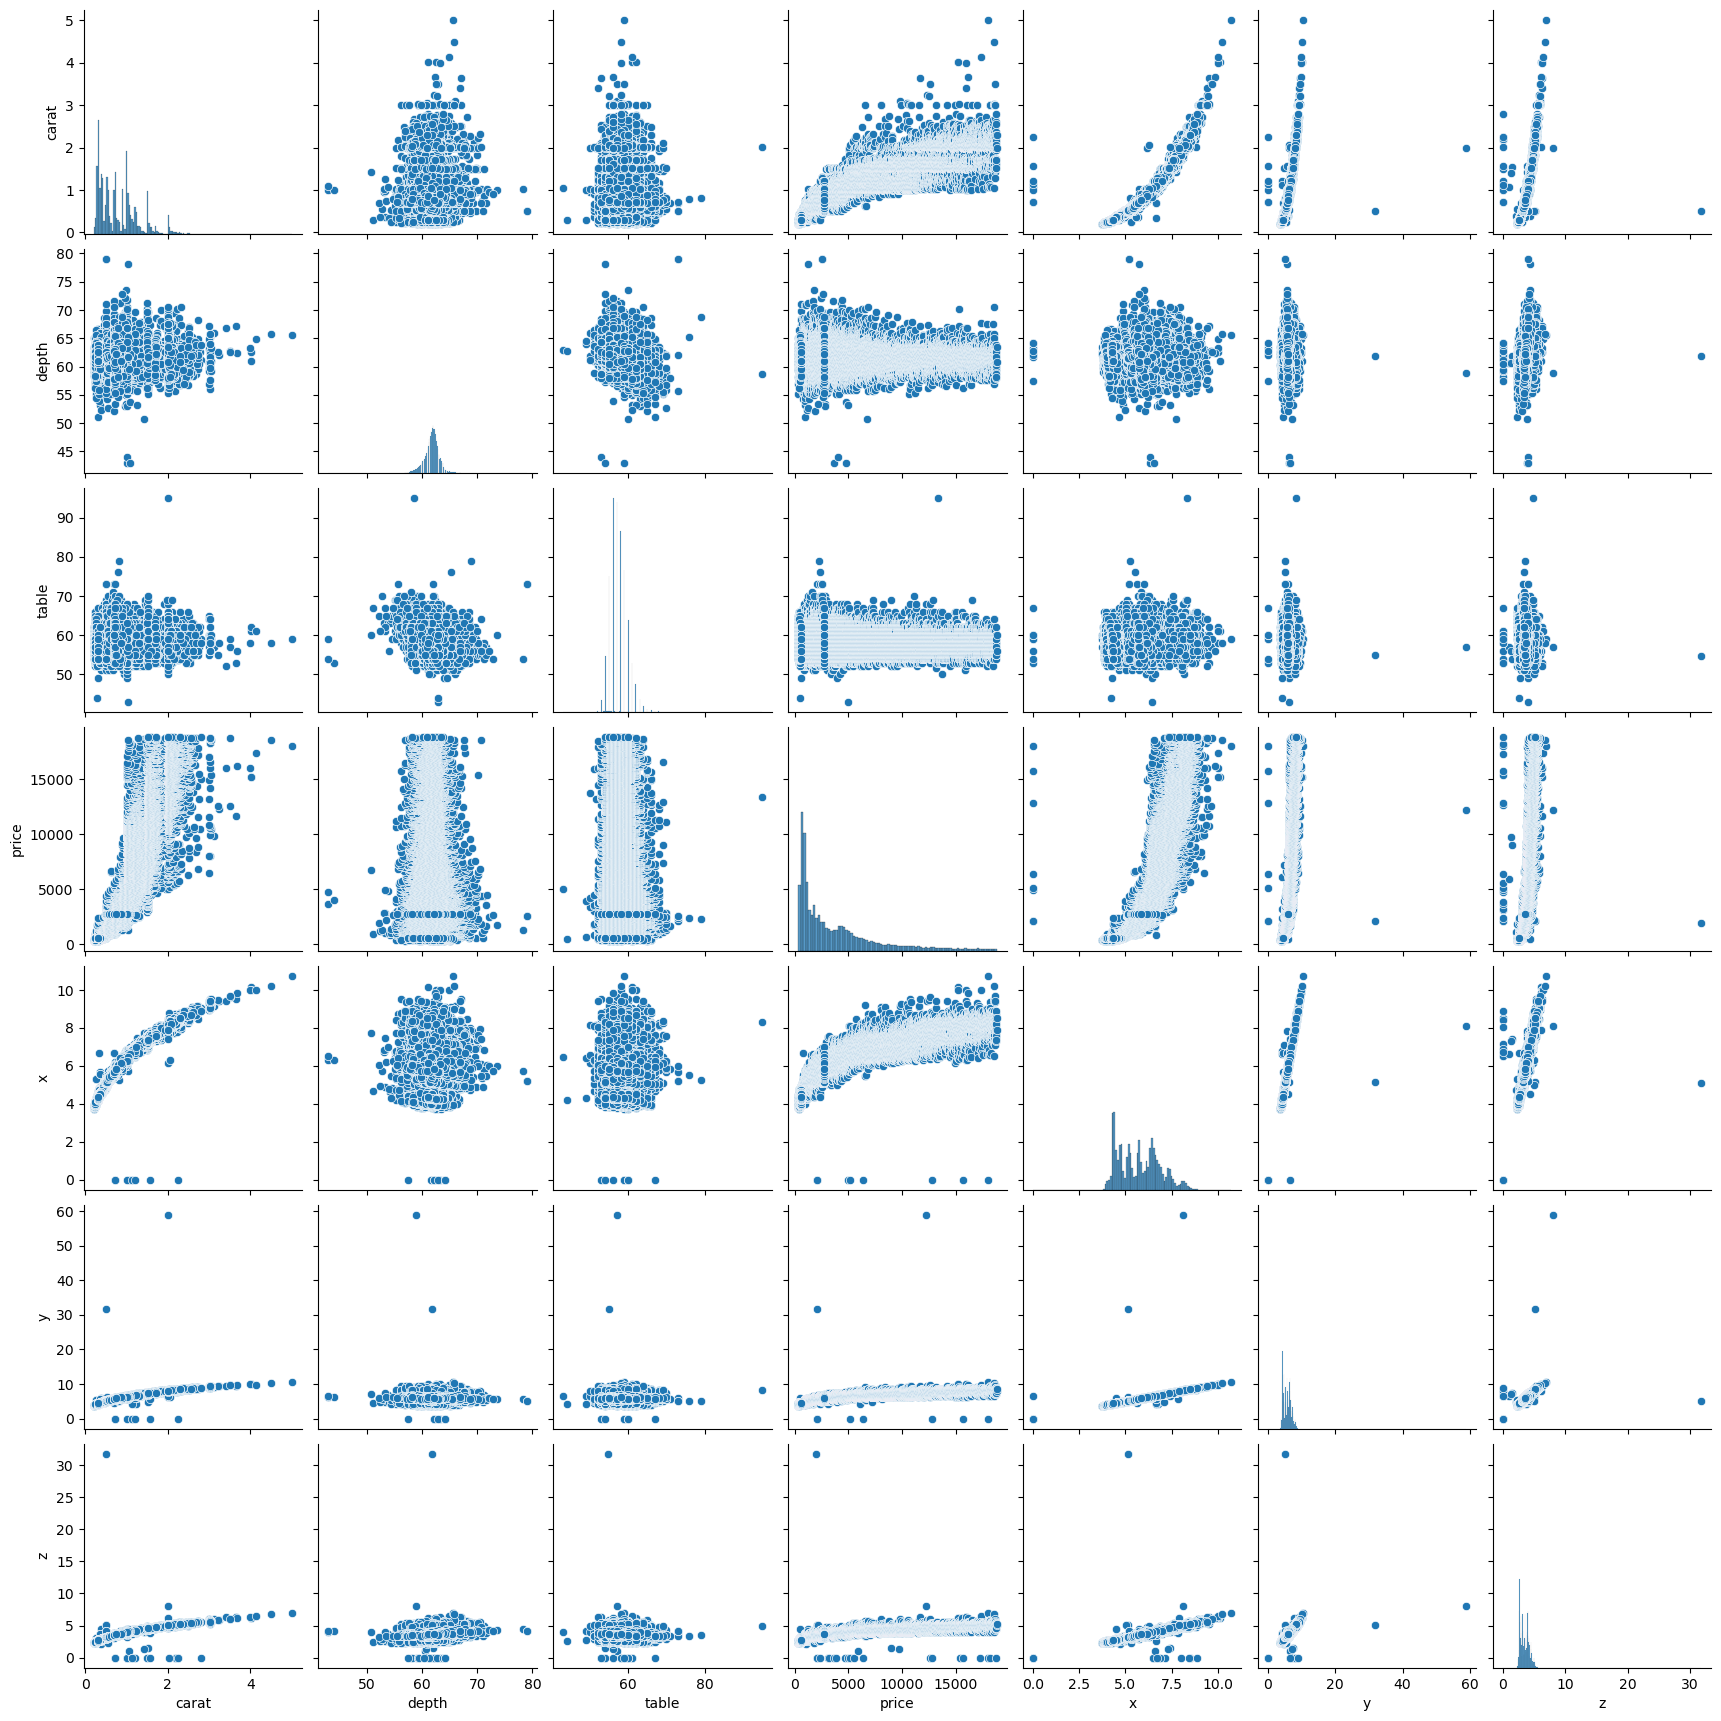

In [18]:
# 시각화 코드를 작성해주세요
import matplotlib.pyplot as plt

plt.scatter(diamonds['price'], diamonds['carat'])
sns.pairplot(diamonds)

#### 수치화

In [22]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst
spst.pearsonr(diamonds['price'], diamonds['carat'])

PearsonRResult(statistic=0.921591301193477, pvalue=0.0)

<여기에 검정 결과를 해석해주세요>\
price, carat 간 상관관계가 강하고 pvalue가 0.05이하로 두 변수간 선형관계가 있다

### 범주형 - 수치형 (cut - carat)
* 귀무가설: cut별 평균 carat에는 차이가 없다 
* 대립가설: cut별 평균 carat에는 차이가 있다 

#### 시각화

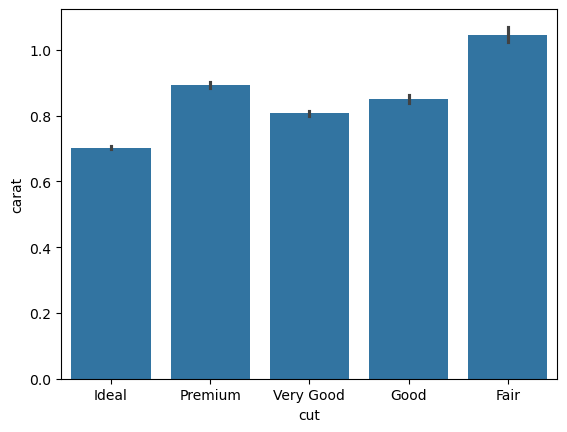

In [29]:
# 시각화 코드를 작성해주세요
sns.barplot(x = 'cut', y = 'carat', data = diamonds)

plt.show()

#### 수치화

In [35]:
# 여기에 검정을 수행하는 코드를 적어주세요.
cut_I= diamonds.loc[diamonds['cut']== 'Ideal', 'carat'].dropna()
cut_P= diamonds.loc[diamonds['cut']== "Premium", 'carat'].dropna()
cut_V= diamonds.loc[diamonds['cut']== 'Very Good', 'carat'].dropna()
cut_G= diamonds.loc[diamonds['cut']== 'Good', 'carat'].dropna()
cut_F= diamonds.loc[diamonds['cut']== 'Fair', 'carat'].dropna()

# ANOVA 실시
f_value, p_value = spst.f_oneway(cut_I, cut_P, cut_V, cut_G, cut_F)

# 결과 출력
print(f"F-Value: {f_value}, P-Value: {p_value}")


F-Value: 495.69425927416324, P-Value: 0.0


<여기에 검정 결과를 해석해주세요>\
F값이 2~3 이상으로 cut별 carat의 차이가크며, p값 역시 0.05이하로 유의미한 차이를 나타냄

### 범주형 - 범주형 (color - clarity)
* 귀무가설: color 와 clarity는 서로 관련이 없다.
* 대립가설: color 와 clarity는 서로 관련이 있다. 

#### 시각화

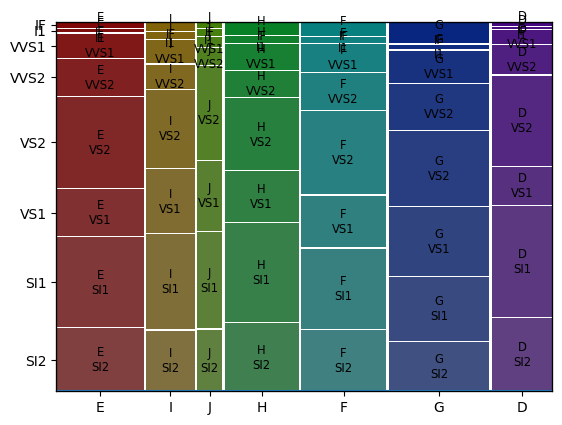

In [48]:
# 시각화 코드를 작성해주세요
from statsmodels.graphics.mosaicplot import mosaic

mosaic(diamonds, ['color','clarity'])
plt.axhline()

#### 수치화

In [54]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['color'],diamonds['clarity'])
display(table)
spst.chi2_contingency(table)

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
color,,,,,,,,
D,73,252,553,705,1697,2083,1370,42
E,158,656,991,1281,2470,2426,1713,102
F,385,734,975,1364,2201,2131,1609,143
G,681,999,1443,2148,2347,1976,1548,150
H,299,585,608,1169,1643,2275,1563,162
I,143,355,365,962,1169,1424,912,92
J,51,74,131,542,731,750,479,50


Chi2ContingencyResult(statistic=2047.0791639481317, pvalue=0.0, dof=42, expected_freq=array([[ 224.82851316,  459.07721542,  636.30237301, 1026.29820171,
        1539.63570634, 1640.99694105, 1154.78958102,   93.0714683 ],
       [ 325.11364479,  663.84936967,  920.12610308, 1484.08021876,
        2226.39276974, 2372.9663515 , 1669.88539118,  134.58615128],
       [ 316.65146459,  646.57044865,  896.17671487, 1445.45202076,
        2168.44338154, 2311.20189099, 1626.42098628,  131.08309232],
       [ 374.72525028,  765.1512792 , 1060.5352614 , 1710.54749722,
        2566.1352614 , 2735.0756396 , 1924.70611791,  155.12369299],
       [ 275.56840934,  562.68298109,  779.90478309, 1257.91590656,
        1887.10478309, 2011.34149055, 1415.40556174,  114.07608454],
       [ 179.92918057,  367.39729329,  509.22973674,  821.34152762,
        1232.16307008, 1313.28197998,  924.17256211,   74.48464961],
       [  93.18353726,  190.27141268,  263.72502781,  425.36462736,
         638.12502781,  

<여기에 검정 결과를 해석해주세요>\
pvalue가 0.05 이하임으로 color와 clarity 간 관련이 있으며, chi2값이 42*2보다 크므로 그 관련 정도가 큼

고생 많으셨어요:) 회귀 세션도 화이팅!